In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster import cluster_visualizer

In [2]:
#Carregamento da base de dados
base = pd.read_csv('idh_classificado.csv')
base

,PAÍS,PIB,ILE,IPC,ClassIDH
0,África do Sul,0.004457,6.97,44,Médio
1,Albânia,0.000182,7.81,35,Médio
2,Alemanha,0.045774,7.91,80,Alto
3,Angola,0.001282,5.50,26,Médio
4,Arábia Saudita,0.008244,6.85,53,Alto
...,...,...,...,...,...
151,Uruguai,0.000722,7.36,71,Alto
152,Venezuela,0.001191,2.83,16,Médio
153,Vietnã,0.002921,6.26,37,Médio
154,Zâmbia,0.000032,7.09,34,Médio


In [3]:
#Criando ordenamento específico para IDH
classe_ordenada = pd.CategoricalDtype(categories = ['Alto', 'Médio', 'Baixo'], ordered = True)
base['ClassIDH'] = base['ClassIDH'].astype(classe_ordenada)

In [4]:
#Aplicando ordenamento criado na base de dados
base.sort_values('ClassIDH', ascending = True, inplace = True)
base

,PAÍS,PIB,ILE,IPC,ClassIDH
47,Emirados Árabes Unidos,0.005014,7.28,71,Alto
121,Polônia,0.007092,7.20,58,Alto
122,Portugal,0.002916,7.79,62,Alto
57,França,0.030892,7.55,69,Alto
56,Finlândia,0.000332,7.92,86,Alto
...,...,...,...,...,...
103,Moçambique,0.000174,6.15,26,Baixo
90,Libéria,0.000039,6.35,28,Baixo
98,Mali,0.000020,5.83,29,Baixo
33,Chade,0.000133,5.60,20,Baixo


In [5]:
#Agrupando por classe
base.groupby(['ClassIDH']).size()

ClassIDH
Alto     62
Médio    77
Baixo    17
dtype: int64

In [6]:
#Separando atributos agrupadores para calcular as medianas de cada categoria do IDH (Alto, Médio, Baixo)
media_classes = base.iloc[:, 2:5]
media_classes

,ILE,IPC,ClassIDH
47,7.28,71,Alto
121,7.20,58,Alto
122,7.79,62,Alto
57,7.55,69,Alto
56,7.92,86,Alto
...,...,...,...
103,6.15,26,Baixo
90,6.35,28,Baixo
98,5.83,29,Baixo
33,5.60,20,Baixo


In [7]:
#Descobrindo a média de ILE e IPC para um IDH Alto
media_IDHalto = media_classes.loc[media_classes['ClassIDH']=='Alto']
alto = media_IDHalto.mean()
#Descobrindo a média de ILE e IPC para um IDH Médio
media_IDHmedio = media_classes.loc[media_classes['ClassIDH']=='Médio']
medio = media_IDHmedio.mean()
#Descobrindo a média de ILE e IPC para um IDH Baixo
media_IDHbaixo = media_classes.loc[media_classes['ClassIDH']=='Baixo']
baixo = media_IDHbaixo.mean()

In [8]:
#Alto
alto

ILE     7.67871
IPC    62.00000
dtype: float64

In [9]:
#Médio
medio

ILE     6.588701
IPC    33.714286
dtype: float64

In [10]:
#Baixo
baixo

ILE     5.855294
IPC    26.823529
dtype: float64

In [11]:
#Definindo agrupadores e classe
agrupadores = base.iloc[:, 2:4].values
classe = base.iloc[:, 4].values

In [12]:
#Codificando a classe com Label Encoder
labelencoder = LabelEncoder()
classe = labelencoder.fit_transform(classe)
classe

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [13]:
#Definindo os centros dos agrupadores
cluster = kmedoids(agrupadores, [30, 98, 145])
cluster.get_medoids()

[30, 98, 145]

In [14]:
#Agrupando a classe com base nos centros definidos anteriormente
cluster.process()
agrupamento = cluster.get_clusters()
medoides = cluster.get_medoids()
agrupamento

[[1,
  2,
  7,
  8,
  9,
  11,
  12,
  13,
  15,
  16,
  17,
  19,
  21,
  22,
  24,
  26,
  27,
  28,
  30,
  32,
  37,
  38,
  40,
  41,
  42,
  43,
  50,
  52,
  58,
  59,
  60,
  61,
  62,
  63,
  77,
  84,
  93,
  95,
  105,
  116,
  127,
  132,
  137],
 [0,
  3,
  4,
  5,
  6,
  10,
  14,
  20,
  25,
  29,
  31,
  33,
  34,
  35,
  36,
  39,
  45,
  46,
  47,
  48,
  49,
  51,
  53,
  55,
  56,
  138],
 [18,
  23,
  44,
  54,
  57,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  78,
  79,
  80,
  81,
  82,
  83,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  94,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  128,
  129,
  130,
  131,
  133,
  134,
  135,
  136,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155]]

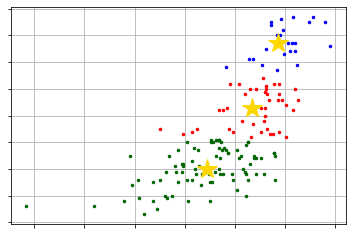

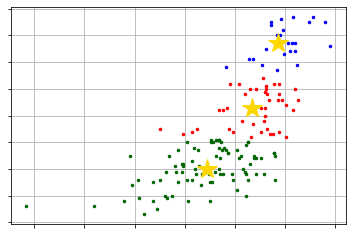

In [15]:
#Visualizando o agrupamento
v = cluster_visualizer()
v.append_clusters(agrupamento, agrupadores)
#Visualizando medoids de inicialização dos clusters
v.append_cluster(medoides,  data = agrupadores, marker = '*', markersize = 20)
v.show()

In [16]:
#Criando 2 listas, uma com dados reais da classe e outra com a classe agrupada com K-medoids
lista_agrupamento = []
lista_real = []
for i in range(len(agrupamento)):
     for j in range(len(agrupamento[i])):
        lista_agrupamento.append(i)
        lista_real.append(classe[agrupamento[i][j]])

In [17]:
#Criando a matriz de confusão para comparar as duas listas
lista_agrupamento = np.asarray(lista_agrupamento)
lista_real = np.asarray(lista_real)
resultado = confusion_matrix(lista_real, lista_agrupamento)
resultado

array([[32, 25,  5],
       [ 0,  0, 17],
       [11,  1, 65]], dtype=int64)

In [18]:
#Verificando a performance de acerto do agrupamento K-medoids
taxa_acerto = accuracy_score(lista_real, lista_agrupamento)
taxa_acerto

0.6217948717948718